In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical


In [3]:
env = gym.make('CartPole-v0')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns 

In [4]:
class Policy(nn.Module):
    def __init__(self, state_size=4, action_size=2, hidden_size=32):
        super(Policy, self).__init__()
        self.fc1 = nn.Linear(state_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, action_size)
        
    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = self.fc2(x)
        return F.softmax(x, dim=1)
    
    def act(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0)
        probs = self.forward(state).cpu()
        model = Categorical(probs)
        action = model.sample()
        return action.item(), model.log_prob(action)
    

In [5]:
def reinforce(policy, policy_optimizer, n_episodes=1000, max_t=500, gamma=1.0, print_every=100):    
    scores_deque = deque(maxlen=100)
    scores = []
    policy_loss_ = []
    for e in range(n_episodes):
        saved_log_probs = []
        rewards = []
        states = []
        env.reset()
        state = env.state        
    
        for t in range(max_t):
            action, log_prob = policy.act(state)
            saved_log_probs.append(log_prob)
            state, reward, done, _= env.step(action)
            rewards.append(reward)
             
            if done:
                break
            
        R_eps = sum(rewards)
        R = np.full(len(rewards), R_eps)

        scores.append(R[0])
                       
        for i, log_prob in enumerate(saved_log_probs):
            policy_loss_.append(-log_prob * R[i])
    
    #print(len(policy_loss_))
    #print(policy_loss_)
    policy_loss = torch.cat(policy_loss_).sum()  
    policy_optimizer.zero_grad()
    policy_loss.backward()
    policy_optimizer.step()
    

    return np.mean(scores)


In [7]:
policy = Policy()
policy_optimizer = optim.Adam(policy.parameters(), lr=1e-2)
rewards = []

for itr in range(500):
    print("Running iteration: ", itr)
    rewards.append(reinforce(policy, policy_optimizer, n_episodes=1000, max_t = 500))




Running iteration:  0
Running iteration:  1
Running iteration:  2
Running iteration:  3
Running iteration:  4
Running iteration:  5
Running iteration:  6
Running iteration:  7
Running iteration:  8
Running iteration:  9
Running iteration:  10
Running iteration:  11
Running iteration:  12
Running iteration:  13
Running iteration:  14
Running iteration:  15
Running iteration:  16
Running iteration:  17
Running iteration:  18
Running iteration:  19
Running iteration:  20
Running iteration:  21
Running iteration:  22
Running iteration:  23
Running iteration:  24
Running iteration:  25
Running iteration:  26
Running iteration:  27
Running iteration:  28
Running iteration:  29
Running iteration:  30
Running iteration:  31
Running iteration:  32
Running iteration:  33
Running iteration:  34
Running iteration:  35
Running iteration:  36
Running iteration:  37
Running iteration:  38
Running iteration:  39
Running iteration:  40
Running iteration:  41
Running iteration:  42
Running iteration:  4

KeyboardInterrupt: ignored

In [12]:
rewards


[23.581,
 25.87,
 28.141,
 29.67,
 32.86,
 35.218,
 36.963,
 40.355,
 41.362,
 45.451,
 48.127,
 49.133,
 51.761,
 54.126,
 58.626,
 60.391,
 63.684,
 68.543,
 71.122,
 77.362,
 81.428,
 90.12,
 102.508,
 113.965,
 130.679,
 143.874,
 149.941,
 152.603,
 161.419,
 168.992,
 177.275,
 184.136,
 188.822,
 190.55,
 192.691,
 191.599,
 194.369,
 196.645,
 198.5,
 199.332,
 199.385,
 199.13,
 199.677,
 199.758,
 199.635,
 199.577,
 199.445,
 199.427,
 199.269,
 199.269,
 199.617,
 199.325,
 199.528,
 199.157,
 199.478,
 199.534,
 199.525,
 199.79,
 199.542,
 199.326,
 199.41,
 199.582,
 199.636,
 199.782,
 199.879,
 199.538,
 199.78,
 199.76,
 199.861,
 199.317,
 197.769,
 195.565,
 198.043,
 199.562,
 199.847,
 199.842,
 199.961,
 199.849,
 199.911,
 199.815,
 199.981,
 199.962,
 199.81,
 200.0,
 199.955,
 200.0,
 199.864,
 199.924,
 200.0,
 199.992,
 200.0,
 199.846,
 199.934,
 199.834,
 199.694,
 199.46,
 199.541,
 199.204,
 199.376,
 199.647,
 199.843,
 199.898]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Vanilla Policy Gradient')

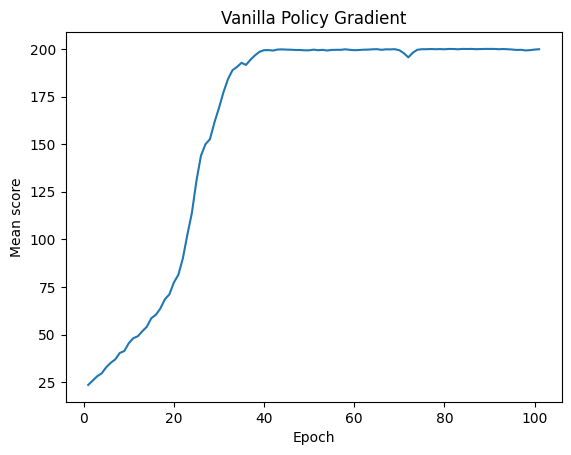

In [11]:
x_axis = [i for i in range(1, len(rewards)+1)]
plt.plot(x_axis, rewards)
plt.xlabel('Epoch') 
plt.ylabel('Mean score') 
plt.title('Vanilla Policy Gradient')